In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1
 (énergie rayonnante d’un corps noir). L’énergie rayonnante d’un corps noir dans l’intervalle
d’émission [λ, λ + dλ], par unité de surface et de temps, est appelée émittance monochromatique
maximale du corps noir et est notée M(λ). Sa valeur, exprimée en W b/m2
, est donnée par la loi
de Planck :
M(λ) = 2πhC2
0
n2λ
5
1
exp( hC0
nkT λ) − 1
.
Les constantes intervenant dans cette loi sont
• C0 ≈ 2.997 × 108m/s : vitesse de la lumière dans le vide.
• h ≈ 6.625 × 10−34J.s : constante de Planck.
• k ≈ 1.380 × 10−23J/K : constante de Boltzmann.
• λ : longueur d’onde (m).
• T : température absolue de la surface du corps noir (K).
• n = 1 : indice de réfraction du milieu (ici le vide).

In [2]:
#On definit la fonction 
def M_func(lmbd,T):
    C0 = 2.997e8
    h = 6.625e-34
    k = 1.380e-23
    #n = 1
    temp1 = (2*np.pi*h*C0**2)/(lmbd**5)
    temp2 = h*C0/(k*T*lmbd)
    return temp1/(np.exp(temp2)-1)

In [3]:
T_arr = np.linspace(300,800,11)
lmbd_arr = np.linspace(10e-7, 2e-5,100) 

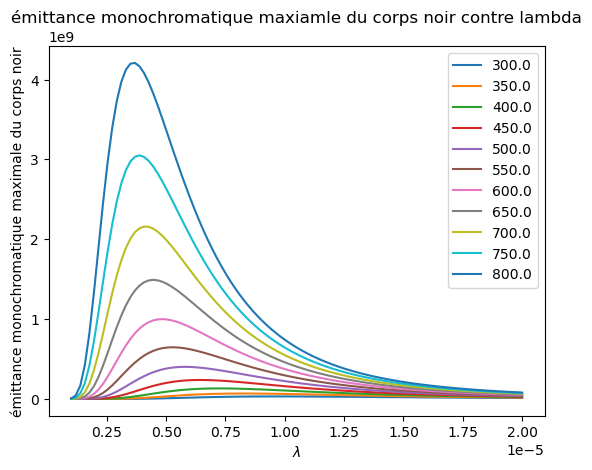

In [4]:
for i in range (0,11):
    res_arr = M_func(lmbd_arr,T_arr[i]) 
    plt.plot(lmbd_arr,res_arr,label = (T_arr[i]))

plt.xlabel(r'$\lambda$')
plt.ylabel('émittance monochromatique maximale du corps noir')
plt.title('émittance monochromatique maxiamle du corps noir contre lambda')
plt.legend()


Au dessous, on montre l'émittance monochromatique maximale du corps noir pour plusiers valeurs de la temperature absolue de la surface du corps noir (T). On regarde que les températures plus élevées ont des maxima plus élevés qui correspondent aux valeurs plus petits de lambda.

On souhaite trouver la valeur λ* de λ qui maximise l’émittance monochromatique pour une température de surface T donnée. 
Pour utiliser la méthode de la section dorée, il faut que la fonction soit unimodale. 

## Do I need to jusitfy unimodalité de f?

In [5]:


p = (np.sqrt(5) - 1)/2 # 1 / phi


def sec_dor(f, a, b, tol=1e-10):
    """La méthode de la section dorée
    
    donné une fonction f qui est unimodale dans
    l'intervalle [a,b], sec_dor retourne une minimiseur
    avec une precision de la tolerance (tol)
    
    """
     # on assure que [a,b] est une intervalle bien definie
    (a,b) = (min(a,b),max(a,b)) 
   
    h = b - a
    if h <= tol: #on termine si l'intervalle ]a,b[ est déjà assez petit
        return (a + b) / 2 # on retourne la moyenne de l'intervalle qui contient la minimum

    # on détermine les valeurs initiales de f(c) et f(d)
    c = a + (1-p) * h
    d = a + p * h
    val_c = f(c)
    val_d = f(d)
    
    k = 0

    while h >= tol and k < 10000:           
        #on termine lorsque l'intervalle ]a,b[ est assez petit ou la nombre d'iterations devient trop grande.
        if val_c < val_d:  
            # yc > yd on met à jour les valeurs de b,c,d et h
            b = d
            d = c
            val_d = val_c # on réutilise la valeur de f(c) de l'itération précedente
            h = p * h  # caractéristique de la methode
            c = a + (1 - p) * h
            val_c = f(c) # on prend une seule evaluation de f
        else: 
            # yc < yd on met à jour les valeurs de a,c,d et h
            a = c
            c = d
            val_c = val_d 
            h = p * h 
            d = a + p * h
            val_d = f(d) # la seule evaluation de f
        k = k+1

    if val_c < val_d:
        return (a + d) / 2
    else:
        return (c + d) / 2

    
    


In [6]:
a = 10e-7
b = 2e-5

T = 550
G = lambda lmbd: - M_func(lmbd, T)

print(sec_dor(G, a, b))

5.2686629551842115e-06


this algorithm returns the minimum, but we are looking for the maximum of our function so we apply the algorithm to - f.

In [7]:
min_arr = np.zeros(T_arr.shape)
i = 0

for T in T_arr: # on cherche la minimiseur pour chaque valeur de T
    G = lambda lmbd:  -M_func(lmbd, T)
    min_arr[i] =  sec_dor(G, a, b)
    print("the minimum for T = ", T," is", min_arr[i])
    i += 1

the minimum for T =  300.0  is 9.659242454139414e-06
the minimum for T =  350.0  is 8.279334778401501e-06
the minimum for T =  400.0  is 7.2444388334929785e-06
the minimum for T =  450.0  is 6.439483313364191e-06
the minimum for T =  500.0  is 5.795532747521257e-06
the minimum for T =  550.0  is 5.2686629551842115e-06
the minimum for T =  600.0  is 4.829618688966494e-06
the minimum for T =  650.0  is 4.4581068118794616e-06
the minimum for T =  700.0  is 4.139658167047651e-06
the minimum for T =  750.0  is 3.863691262311953e-06
the minimum for T =  800.0  is 3.6222035105435013e-06


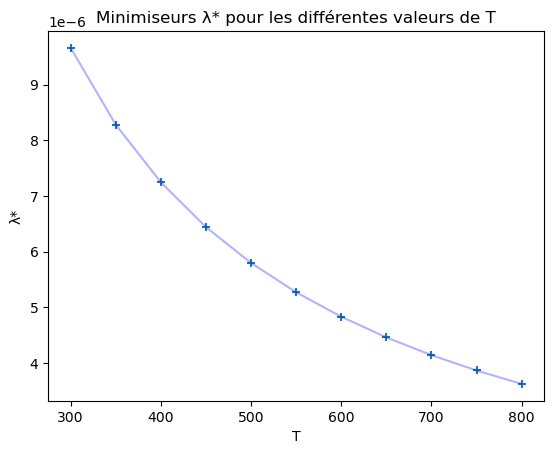

In [8]:
min_arr

fig, ax = plt.subplots()
ax.set_title("Minimiseurs λ* pour les différentes valeurs de T")
ax.set_xlabel("T")
ax.set_ylabel("λ*")

ax.scatter(T_arr,min_arr, marker = "+")
ax.plot(T_arr,min_arr,'b', alpha = 0.3)


This graph shows a negative correlation between values of T and the value of lambda *

Maintenant, on souhaite vérifier les lois de Wien : $λT = A $ et
$M(λ) = BT^5$
, où A et B désignent des constantes.

A =  0.0028978
B =  1.2857e-05


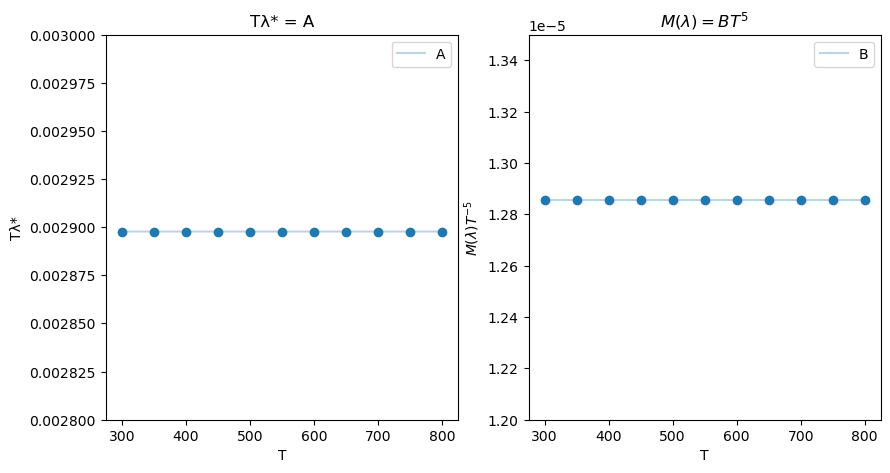

In [9]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].set_title("Tλ* = A")
ax[0].set_ylim(2.8e-3,3e-3)
ax[0].set_xlabel("T")
ax[0].set_ylabel("Tλ*")
ax[0].scatter(T_arr,T_arr*min_arr)
ax[0].plot(T_arr,T_arr*min_arr,alpha = 0.3,label = "A")

print("A = ", np.round(np.mean(T_arr*min_arr),7))

ax[1].set_title('$M(λ) = BT^5$')
ax[1].set_ylim(1.2e-5,1.35e-5)
ax[1].set_xlabel("T")
ax[1].set_ylabel("$M(λ)T^{-5}$")
ax[1].scatter(T_arr,(T_arr ** -5) * M_func(min_arr,T_arr))
ax[1].plot(T_arr,(T_arr ** -5) * M_func(min_arr,T_arr),alpha = 0.3, label = "B")

print("B = ", np.round(np.mean((T_arr ** -5) * M_func(min_arr,T_arr)),9))

ax[0].legend()
ax[1].legend()


Il est clair par les graphiques au dessus que les deux lois donne une vrai rélation pour tous les valeurs de T qui était considerée. en plus, les constants A et B sont 0.002898 et 1.286e-05 respectivement.


## Exercise 2: méthodes de type gradient pour des fonctions quadratiques

In [10]:
from scipy.sparse import diags
import scipy.linalg

In [11]:
def A(n):
    return diags([-2, 4, -2], [-1, 0, 1], shape=(n, n)).toarray()
    
def b(n):
    return np.ones(n)

def Jn(A,b,x):
    return np.dot(np.dot(A,x),x)/2 - np.dot(b,x)

def gradJn(A,b,x):
    return np.dot(A,x) - b # (At + A = 2 * A) comme A symétrique 

In [12]:
nx = 101
x = np.linspace(-10,10,nx)
y = np.linspace(-10,10,nx)
X, Y = np.meshgrid(x,y) #might need to change indexing

Z = np.zeros((nx,nx))
for i in range(nx):
    for j in range(nx):
        Z[i,j] = Jn(A(2),b(2),np.array([X[i,j],Y[i,j]]))

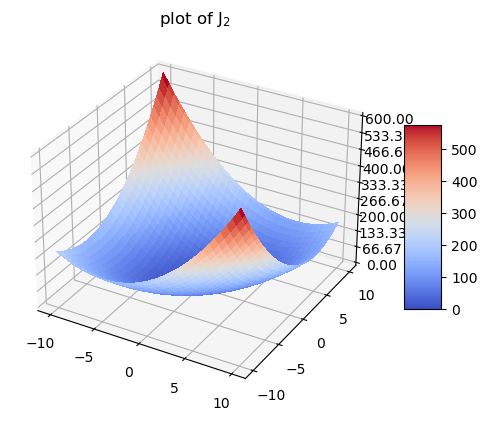

In [13]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np






fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
        
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0,600)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("plot of J$_2$")
plt.show()

In [14]:
print(scipy.sparse.linalg.eigs(A(9))[0])
print(scipy.sparse.linalg.eigs(A(10))[0])
print(scipy.sparse.linalg.eigs(A(20))[0])

[2.76393202+0.j 7.80422607+0.j 7.23606798+0.j 4.        +0.j
 5.23606798+0.j 6.35114101+0.j]
[3.43074065+0.j 4.56925935+0.j 7.83797189+0.j 7.36501413+0.j
 5.66166005+0.j 6.61944294+0.j]
[7.9553233 +0.j 7.82229122+0.j 7.60387547+0.j 7.3049551 +0.j
 6.93220749+0.j 6.49395921+0.j]


toutes les valeurs propres de $A_9$, $A_{10}$, $A_{20}$ sont réel et positive. Alors comme $A_n$ est symmetrique pour tout entier positif n, $A_9$, $A_{10}$, $A_{20}$ sont definie postive.

In [15]:
Jn(A(2),b(2),(0,0))

0.0

comme A = b ??? $J_2$ trouve son minimum lorsque at 0 because equation d'euler? positive. 

Methode de gradient a pas constant

In [16]:
def methpc(J,gradJ,s,x0):
    
    eps = 1e-5
    #étape initiale
    #xk est choisi ici tels que
    #les criteres d'arrete ne sont pas
    #satisfait d'abord
    xk =  x0*10
    xkplus = x0
    xk_arr = [x0]
    #critere d'arrete
    while ((np.linalg.norm(xkplus-xk)/(1 + np.linalg.norm(xk)) > eps) and ((np.linalg.norm(J(xkplus)-J(xk))/(1 + np.linalg.norm(J(xk)))) > eps)):
        xk = xkplus        
        dk = -gradJ(xk) #direction de descente
        #trouver xk+1
        xkplus = xk + s*dk
        #ajouter xk dans la liste
        xk_arr.append(xkplus)
    return xkplus, np.array(xk_arr), len(xk_arr)-1

Il est important de choisir le pas fixe, ni trop grand, ni trop petit
Pour un pas trop grande il n'y aura pas de convergence.
pour un pas trop petit, il peut etre un convergence qui est mal detecté et en plus la reduction dans le pas donne un augmentation dans la coute du compuation

Methode pas optimale

In [17]:
def pas_optimale(J,xk,dk):
    #on choisit l'intervalle de recherche
    #dans la direction du pas dk
    a = 0
    #10 est choisit comme borne superieure
    #par inspection du graphique de J
    b = 10
    #on  définit un nouveau fonction qui
    #s: -> xk + s*dk qu'on veut minimiser par la
    #methode de la section dorrée
    return sec_dor(lambda s: J(xk + s*dk), a, b, tol=1e-5)



def methpo(J,gradJ,x0):  
    
    '''
    On pourra, au choix, utiliser la formule du pas optimal calculée
    en cours ou la méthode de la section dorée pour déterminer le pas optimal.
    
    Retourne:
    xkplus: minimiseur trouvé
    xk_arr: liste des étapes
    len(xk_arr)-1: nombre des étapes
    '''
    eps = 1e-5
    #étape initiale
    #xk est choisi ici tels que
    #les criteres d'arrete ne sont pas
    #satisfait d'abord
    xk = x0*10
    xkplus = x0
    xk_arr = [x0]
    #critere d'arrete
    while ((np.linalg.norm(xkplus-xk)/(1 + np.linalg.norm(xk)) > eps)
           and ((np.linalg.norm(J(xkplus)-J(xk))/
                 (1 + np.linalg.norm(J(xk)))) > eps)):
        xk = xkplus        
        dk = -gradJ(xk) #direction de descente
        #trouver xk+1
        sk = pas_optimale(J,xk,dk)
        xkplus = xk + sk*dk
        xk_arr.append(xkplus)
    return xkplus, np.array(xk_arr), len(xk_arr)-1


Application des methodes

In [18]:
J2=lambda x:Jn(A(2),b(2),x) 
gradJ2=lambda x:gradJn(A(2),b(2),x) 

In [19]:
#créer un "meshgrid" de valeurs de J
#stocker dans X,Y,Z
nx = 101
x = np.linspace(-10,10,nx)
y = np.linspace(-10,10,nx)
X, Y = np.meshgrid(x,y) 

#Valeurs de J
ZJ = np.zeros((nx,nx))
for i in range(nx):
    for j in range(nx):
        ZJ[i,j] = Jn(A(2),b(2),np.array([X[i,j],Y[i,j]]))
        


In [20]:
#Valeurs de GradJ - champ vecteur

#on reduit la nombre d'evaluations pour
#le champ vecteur
nx2 = 10
x2 = np.linspace(-10,10,nx2)
y2 = np.linspace(-10,10,nx2)
X2, Y2 = np.meshgrid(x2,y2) 

U = np.zeros((nx2,nx2))
V = np.zeros((nx2,nx2))
for i in range(nx2):
    for j in range(nx2):
        U[i,j], V[i,j] = gradJn(A(2),b(2),np.array([X2[i,j],Y2[i,j]]))




In [21]:
#Methode au pas constante
s = 0.01
x0 = np.array([2,8])
sol_pc, pas_const, pas_const_len = methpc(J2,gradJ2,s,x0)

In [22]:
#methode au pas optimale:

x0 = np.array([2,8])
sol_po, pas_opt, pas_opt_len = methpo(J2,gradJ2,x0)

In [23]:
sol_po, sol_pc, pas_opt_len

(array([0.50025189, 0.50125973]), array([0.51337582, 0.51337593]), 10)

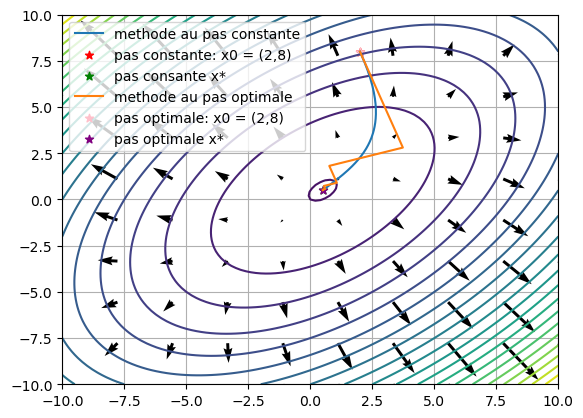

In [24]:
fig, ax = plt.subplots()
ax.set_ylim([-10,10])
ax.set_xlim([-10,10])
#tracer 
#1)courbes de niveau pour J
ax.contour(X, Y, ZJ, 20)
#2)champ vecteur de gradJ
ax.quiver(X2, Y2, U, V)



#3a)points pour pas constante
ax.plot(pas_const[:,0],pas_const[:,1],
        label = 'methode au pas constante')
#3b)point initiale pour pas constante
ax.scatter(pas_const[0,0],pas_const[0,1],
           label = "pas constante: x0 = (2,8)",
           c="r", marker = "*")
#3c) point finale pour pas constante
ax.scatter(pas_const[-1,0],pas_const[-1,1],
           label = "pas consante x*", c="g", 
           marker = "*")

#4a)points pour pas optimale
ax.plot(pas_opt[:,0],pas_opt[:,1],
        label = 'methode au pas optimale')
#3b)point initiale pour pas optimale
ax.scatter(pas_opt[0,0],pas_opt[0,1],
           label = "pas optimale: x0 = (2,8)",
           c="pink", marker = "*")
#3c) point finale pour pas optimale
ax.scatter(pas_opt[-1,0],pas_opt[-1,1],
           label = "pas optimale x*", c="purple", 
           marker = "*")

ax.grid(True)

ax.legend()



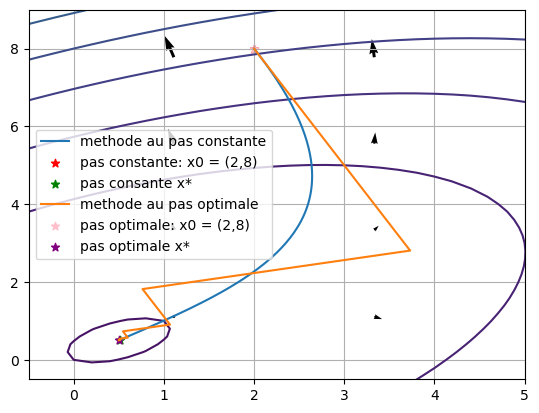

In [25]:
fig, ax = plt.subplots()
ax.set_ylim([-0.5,9])
ax.set_xlim([-0.5,5])
#tracer 
#1)courbes de niveau pour J
ax.contour(X, Y, ZJ, 20)
#2)champ vecteur de gradJ
ax.quiver(X2, Y2, U, V)



#3a)points pour pas constante
ax.plot(pas_const[:,0],pas_const[:,1],
        label = 'methode au pas constante')
#3b)point initiale pour pas constante
ax.scatter(pas_const[0,0],pas_const[0,1],
           label = "pas constante: x0 = (2,8)",
           c="r", marker = "*")
#3c) point finale pour pas constante
ax.scatter(pas_const[-1,0],pas_const[-1,1],
           label = "pas consante x*", c="g", 
           marker = "*")

#4a)points pour pas optimale
ax.plot(pas_opt[:,0],pas_opt[:,1], 
        label = 'methode au pas optimale')
#3b)point initiale pour pas optimale
ax.scatter(pas_opt[0,0],pas_opt[0,1],
           label = "pas optimale: x0 = (2,8)",
           c="pink", marker = "*")
#3c) point finale pour pas optimale
ax.scatter(pas_opt[-1,0],pas_opt[-1,1],
           label = "pas optimale x*", c="purple", 
           marker = "*")

ax.grid(True)

ax.legend()

Les deux graphiques montre la comportement des algorithmes dans la region afin de trouver le minimum de J. La methode au pas constante suit une courbe et la methide au pas optimate est affine par morceaux. Dans ce cas, la methode au pas constante prend dix étapes. Chaque méthode trouve la meme location de minima avec un niveau de différence qui est consistante avec l'incertitude associé aux notre critères d'arrete

# Rapidité de convergence pour valeurs différentes de n

## Exercise 3

On considère maintenant la Fonction de Rosenbrock: $f(x, y) = (x - 1)^2 + 10(x^2 - y)^2$

Pour trouver les points critiques de la fonction
il faut trouver les valeurs de x et y où les dérivées partielles par rapport à x et y s'annullent. 

1. Calculer les derivées partielles de f par rapport à x et y:

   $∂f/∂x = 2(x - 1) + 40x(x^2 - y)$
   
   $∂f/∂y = -20(x^2 - y)$

2. trouver x et y tel que les derivées partielles s'annullent:

   $∂f/∂y = 0$: 
   
   $-20(x^2 - y) = 0$
   
   en simplifiant:
   
   $x^2 - y = 0$
   
   ceci donne $y = x^2$.

   on pose $y = x^2$ dans $∂f/∂x = 0$:

   $2(x - 1) + 40x(x^2 - x^2) = 0$
   
   $2(x - 1) = 0$
   
   enfin $x = 1$.

3. comme $x = 1$ et $y = x^2$:

   $y = 1^2$
   
   qui donne $y = 1$.

alors, le seul point critique de $f(x, y) = (x - 1)^2 + 10(x^2 - y)^2$ en $R^2$ est $(1, 1)$. 

ce point critique est soit un maximum global, soit un minimum global.

comme $f(0,0) = 1$ et $f(1,1) = 0$ donc $f(0,0) > f(1,1)$.

alors $(1,1)$ est forcement un minimum global

$$∇^2f(x, y) = \begin{bmatrix} \frac{∂^2f}{∂x^2} & \frac{∂^2f}{∂x∂y}  \\ \frac{∂^2f}{∂x∂y} & \frac{∂^2f}{∂y^2} \end{bmatrix}$$

$\frac{∂^2f}{∂x^2} = 2 + 120x - 40y$

$\frac{∂^2f}{∂y^2} = -20$

$\frac{∂^2f}{∂x∂y} = -40x$

Ainsi:

$$∇^2f(1, 1) = \begin{bmatrix} 82 & -40 \\ -40 & -20 \end{bmatrix}$$

In [26]:
jacpc = np.array([[82,-40],[-40,-20]])
print("le conditionnement de la matrice est ",np.linalg.cond(jacpc))

le conditionnement de la matrice est  2.833499242261883


le conditionnement de la matrice est faible et le matrice est donc bien conditionné. Cela signifie que la probleme .....

In [27]:
def f(x):
    return (x[0] - 1)**2 + 10 * (x[0]**2 - x[1])**2

def gradf(x):
    return np.array(
        [2 * (x[0] - 1) + 40 * x[0] * (x[0]**2 - x[1])
         , -20*(x[0]**2 - x[1]) ])
    

In [28]:
#Methode au pas constante
s = 1e-4
x0 = np.array([9,8])
sol_pc, pas_const, pas_const_len = methpc(f,gradf,s,x0)

In [29]:
#methode au pas optimale:

x0 = np.array([2,8])
sol_po, pas_opt, pas_opt_len = methpo(f,gradf,x0)

In [30]:
print(sol_pc)

[2.91429234 8.51938597]


La methode au pas constante n'est pas consitent pour cette fonction. On regarde que la fonction converge pour certains valeurs initiales de x et y

In [31]:
#on fait une graphique qui montre
#la comportement de convergence de la
#fonction.

s=[2e-4,4e-4,6e-4,8e-4,1e-3]
print(X,Y)

#if converges then green dot = "true"
#otherwise red 

[[-10.   -9.8  -9.6 ...   9.6   9.8  10. ]
 [-10.   -9.8  -9.6 ...   9.6   9.8  10. ]
 [-10.   -9.8  -9.6 ...   9.6   9.8  10. ]
 ...
 [-10.   -9.8  -9.6 ...   9.6   9.8  10. ]
 [-10.   -9.8  -9.6 ...   9.6   9.8  10. ]
 [-10.   -9.8  -9.6 ...   9.6   9.8  10. ]] [[-10.  -10.  -10.  ... -10.  -10.  -10. ]
 [ -9.8  -9.8  -9.8 ...  -9.8  -9.8  -9.8]
 [ -9.6  -9.6  -9.6 ...  -9.6  -9.6  -9.6]
 ...
 [  9.6   9.6   9.6 ...   9.6   9.6   9.6]
 [  9.8   9.8   9.8 ...   9.8   9.8   9.8]
 [ 10.   10.   10.  ...  10.   10.   10. ]]
